<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

### ***Logistic regression using Hand Written Digits***

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
digits = load_digits()

In [23]:
dir(digits)   #columns in the digits dataset

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Note : From the above columns, "data" is our input (X) and "target" is our (y)

In [24]:
digits.data[0]   #data (in the form of array) for the 0th element in dataset

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

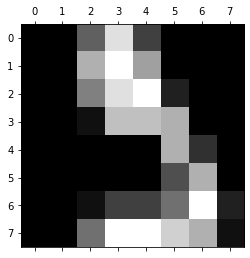

In [25]:
plt.gray() 
plt.matshow(digits.images[19]) #observing the image of 0th element in the dataset

<Figure size 432x288 with 0 Axes>

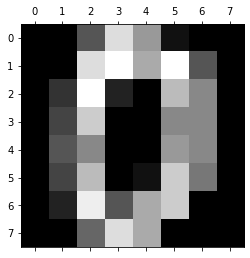

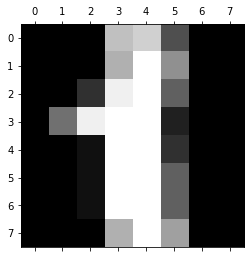

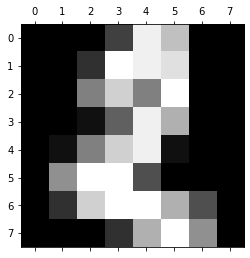

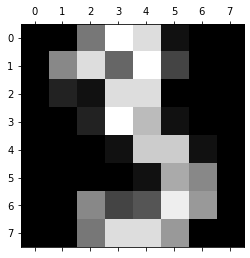

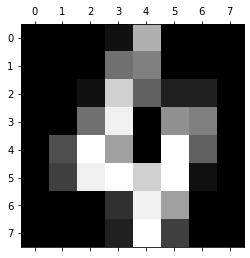

In [26]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])   #observing first 5 images

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [30]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [31]:
model.score(X_test, y_test)

0.95

In [32]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [33]:
y_predicted = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4, 30,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 26,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  1,  0, 40,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  1, 38]])

Text(69.0, 0.5, 'Truth')

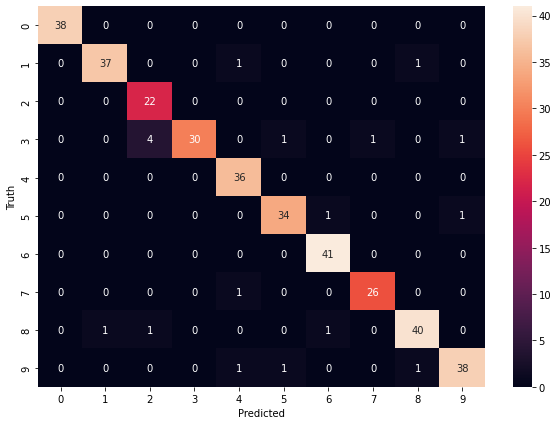

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

All the black boxes which are not zero, are the number of errors our model made in prediction. For ex: when the image was "number 3", 4 times our model mistakenly predicted it to be "number 2".